In [8]:
paramConfig = {
    'c1': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1.0, 'name': 'W', 'unit': 'dimensionless', 'type': 'hardening'}, 
    'c2': {'lowerBound': 0, 'upperBound': 2, 'exponent': 1000.0, 'name': 'K', 'unit': 'MPa', 'type': 'yielding'}, 
    'c3': {'lowerBound': 0, 'upperBound': 1, 'exponent': 0.1, 'name': 'e0', 'unit': 'dimensionless', 'type': 'hardening'}, 
    'c4': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1.0, 'name': 'n', 'unit': 'dimensionless', 'type': 'hardening'}, 
    'c5': {'lowerBound': 0, 'upperBound': 2, 'exponent': 1000.0, 'name': 'sigma_y', 'unit': 'MPa', 'type': 'yielding'}, 
    'c6': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1000.0, 'name': 'sigma_sat', 'unit': 'MPa', 'type': 'hardening'}, 
    'c7': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1000.0, 'name': 'b', 'unit': 'dimensionless', 'type': 'hardening'}
}

geometries = ['NDBR50', 'NDBR6', 'CHD6']

yieldingIndices = {'NDBR50': 200, 'NDBR6': 200, 'CHD6': 1200}

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

##PARAMS
#num_samples represents the number of training samples (data points) to generate.
#X_train contains random input data with dimensions (num_samples, input_size). This data simulates the input features for training.
#Y_train contains random output data with dimensions (num_samples, output_size). This data simulates the target values for training.
#The training loop runs for num_epochs iterations, where num_epochs is the number of times the entire training dataset is processed by the model.

# Define a simple neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define the number of input features, hidden units, and output dimensions
input_size = len(paramConfig)  # Number of input parameters
hidden_size = 64  # Number of hidden units
output_size = input_size  # Number of output dimensions (same as input for this case)

# Create an instance of the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)

# Define a loss function (mean squared error) and an optimizer (e.g., Adam)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) 

# Generate random data 
num_samples = 1000
X_train = torch.rand((num_samples, input_size))  # Random input data
Y_train = torch.rand((num_samples, output_size))  # Random output data

# Training loop
num_epochs = 1000  # Adjust the number of epochs as needed
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    
    # Compute the loss
    loss = criterion(outputs, Y_train)
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model and get predictions
X_test = torch.rand((1, input_size))  
with torch.no_grad():
    predictions = model(X_test)

# Convert predictions to a dictionary
next_param_dict = {param: value.item() for param, value in zip(paramConfig.keys(), predictions[0])}

print(next_param_dict)

Epoch [100/1000], Loss: 0.0887
Epoch [200/1000], Loss: 0.0840
Epoch [300/1000], Loss: 0.0827
Epoch [400/1000], Loss: 0.0820
Epoch [500/1000], Loss: 0.0815
Epoch [600/1000], Loss: 0.0811
Epoch [700/1000], Loss: 0.0808
Epoch [800/1000], Loss: 0.0805
Epoch [900/1000], Loss: 0.0803
Epoch [1000/1000], Loss: 0.0799
{'c1': 0.4976092576980591, 'c2': 0.5453976392745972, 'c3': 0.5117058157920837, 'c4': 0.5463583469390869, 'c5': 0.5009688138961792, 'c6': 0.4744311571121216, 'c7': 0.4518471658229828}


Epoch [100/1000], Loss: 0.0888
Epoch [200/1000], Loss: 0.0850
Epoch [300/1000], Loss: 0.0832
Epoch [400/1000], Loss: 0.0824
Epoch [500/1000], Loss: 0.0819
Epoch [600/1000], Loss: 0.0815
Epoch [700/1000], Loss: 0.0811
Epoch [800/1000], Loss: 0.0808
Epoch [900/1000], Loss: 0.0805
Epoch [1000/1000], Loss: 0.0802


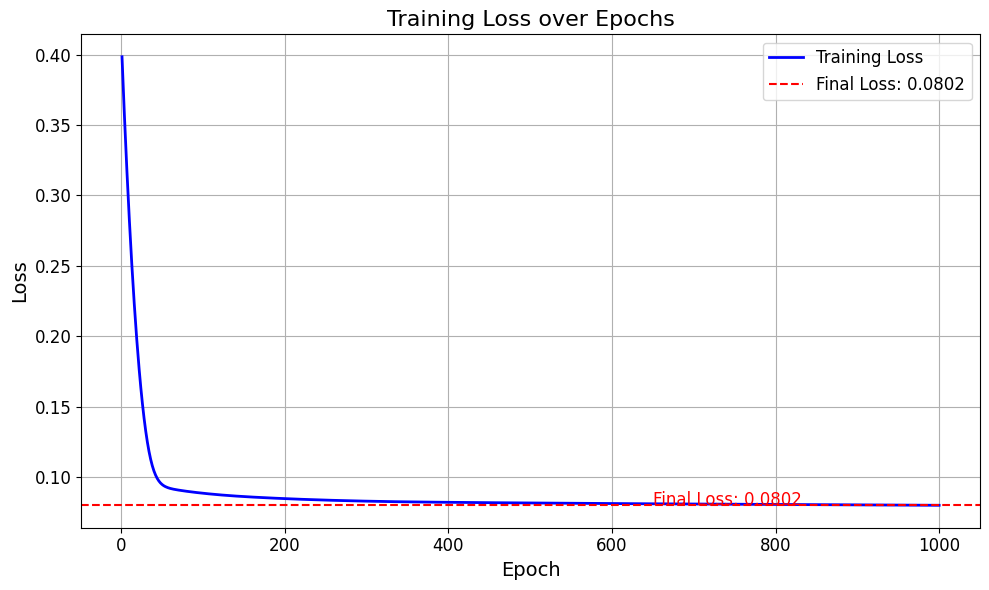

{'c1': 0.6010024547576904, 'c2': 0.4925291836261749, 'c3': 0.5434776544570923, 'c4': 0.5311207175254822, 'c5': 0.6006039977073669, 'c6': 0.49373704195022583, 'c7': 0.5612674951553345}


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define a simple neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define the number of input features, hidden units, and output dimensions
input_size = len(paramConfig)  # Number of input parameters
hidden_size = 64  # Number of hidden units (you can adjust this)
output_size = input_size  # Number of output dimensions (same as input for this case)

# Create an instance of the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)

# Define a loss function (mean squared error) and an optimizer (e.g., Adam)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjust the learning rate as needed

# Generate random data (replace this with your actual data)
num_samples = 1000
X_train = torch.rand((num_samples, input_size))  # Random input data
Y_train = torch.rand((num_samples, output_size))  # Random output data

# Lists to store the loss values for visualization
losses = []

# Training loop
num_epochs = 1000  # Adjust the number of epochs as needed
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    
    # Compute the loss
    loss = criterion(outputs, Y_train)
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Append the loss to the list for visualization
    losses.append(loss.item())
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Create a fancier plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), losses, label='Training Loss', linewidth=2, color='blue')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training Loss over Epochs', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()

# Add a horizontal line indicating the final loss
final_loss = losses[-1]
plt.axhline(final_loss, color='red', linestyle='--', label=f'Final Loss: {final_loss:.4f}')
plt.legend(fontsize=12)

# Add annotations for final loss
plt.annotate(f'Final Loss: {final_loss:.4f}', xy=(0.65 * num_epochs, final_loss), fontsize=12, color='red')

# Show the plot
plt.show()

# Evaluate the model and get predictions
X_test = torch.rand((1, input_size))  # Replace this with your actual input data
with torch.no_grad():
    predictions = model(X_test)

# Convert predictions to a dictionary
next_param_dict = {param: value.item() for param, value in zip(paramConfig.keys(), predictions[0])}

print(next_param_dict)
